<a href="https://colab.research.google.com/github/betty9895/ml-0716/blob/master/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df["label"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Text(0.5, 1.0, 'Cluster')

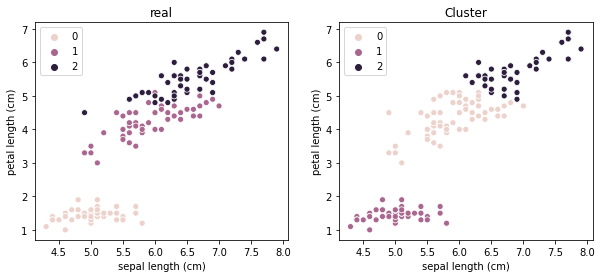

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.subplot(總高度,總寬度,第幾張[1,2,3,4..])
# plt.figure(figsize=(寬度(inches), 高度(inches)))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.scatterplot(df["sepal length (cm)"],
        df["petal length (cm)"],
        hue = iris["target"])
plt.title("real")


plt.subplot(1,2,2)
sns.scatterplot(df["sepal length (cm)"],
        df["petal length (cm)"],
        hue = cluster.labels_)
plt.title("Cluster")

In [40]:
from sklearn.metrics import silhouette_score
for k in range(2,9):
  test=KMeans(n_clusters=k)
  test.fit(iris["data"])
  s=silhouette_score(iris["data"], test.labels_)
  print("[K]",k,"[score]",s)

[K] 2 [score] 0.681046169211746
[K] 3 [score] 0.5528190123564091
[K] 4 [score] 0.4980505049972867
[K] 5 [score] 0.4887488870931048
[K] 6 [score] 0.3648340039670018
[K] 7 [score] 0.35633173727207135
[K] 8 [score] 0.3477684961693679
